In this notebook we will work on creating ouput for our routes.

In [3]:
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image

%matplotlib inline

In [4]:
###OSHAWA/WHITBY 
north = 43.984503
west = -78.821660
south = 43.862879
east = -78.954552

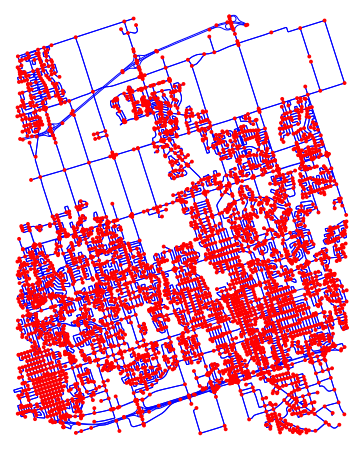

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive') 
# Plotting the map graph 
ox.plot_graph(G, bgcolor='white', edge_color='blue', node_color='red')

### Creating a Route

In [6]:
start_point = (43.902926, -78.949285)
end_point = (43.944515, -78.895384)

In [7]:
# Get the nearest nodes to the locations 
start_node = ox.get_nearest_node(G, start_point) 
end_node = ox.get_nearest_node(G, end_point)

In [8]:
# Generate the optimal path
route = nx.shortest_path(G, start_node, end_node, weight='length')

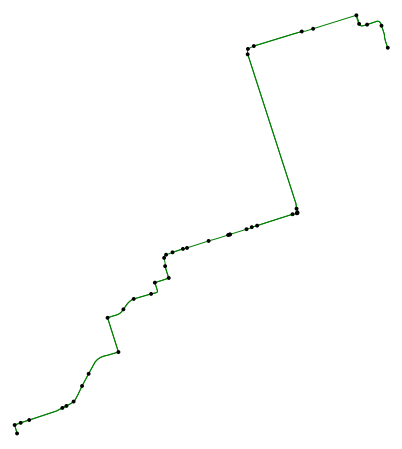

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
# Plot as a subgraph of the original graph
route_graph = G.subgraph(route)
ox.plot_graph(route_graph, bgcolor='white', edge_color='green', node_color='black')

### Getting Route Information

Here we want to get the information for each leg of this route - the street names, road types, and segment lengths.

In [10]:
route_info = list()
num_steps = len(route)
i = 0
j = 1
# We want to get the information for every step in the route
# We handle if any information is unlisted or unknown
while j < num_steps:
    step_info = list()
    try:
        name = G[route[i]][route[j]][0]['name']
        # Sometimes a street may change names within a segment - for example, switching
        # from west to east.  In these cases we will just take the first name.
        if type(name) == list:
            name = name[0]
    except KeyError:
        name = 'Unnamed'
    step_info.append(name)
    try:
        street_type = G[route[i]][route[j]][0]['highway']
    except KeyError:
        street_type = 'Unknown'
    step_info.append(street_type)
    try:
        seg_len = G[route[i]][route[j]][0]['length']
    except KeyError:
        seg_len = 'Unknown'
    step_info.append(seg_len)
    route_info.append(step_info)
    i +=1
    j +=1

In [11]:
# Create a data frame of this information
columns = ['Street Name', 'Type', 'Length']
route_info = pd.DataFrame(route_info, columns=columns)

In [12]:
route_info

Street Name            Type    Length
0         Vanier Street     residential   102.860
1      Dryden Boulevard        tertiary    75.001
2      Dryden Boulevard        tertiary   105.546
3      Dryden Boulevard        tertiary   415.333
4      Dryden Boulevard        tertiary    54.488
5      Dryden Boulevard        tertiary    98.928
6      Dryden Boulevard        tertiary   209.158
7      Dryden Boulevard        tertiary   162.799
8      Dryden Boulevard        tertiary   461.449
9       Anderson Street        tertiary   422.297
10        Darren Avenue     residential   216.811
11        Darren Avenue     residential   175.076
12        Darren Avenue     residential   212.582
13        Darren Avenue     residential   191.314
14        Darren Avenue     residential   172.030
15        Thickson Road       secondary   145.245
16        Thickson Road       secondary    98.485
17              Unnamed  secondary_link    46.540
18    Taunton Road East       secondary    80.863
19    Taunton Road East       secondary   128.654
20    Taunton Road East       secondary    50.288
21    Taunton Road East       secondary   266.205
22    Taunton Road East       secondary   239.539
23    Taunton Road East       secondary    16.288
24    Taunton Road East       secondary     7.951
25    Taunton Road East       secondary   202.581
26    Taunton Road East       secondary    67.126
27    Taunton Road East       secondary    65.243
28    Taunton Road East       secondary   437.440
29    Taunton Road West       secondary    51.350
30    Taunton Road West       secondary     7.651
31  Thornton Road North       secondary     9.856
32  Thornton Road North        tertiary    43.925
33  Thornton Road North        tertiary  1901.796
34              Unnamed   tertiary_link    64.925
35     Conlin Road West        tertiary    77.239
36     Conlin Road West        tertiary   587.724
37     Conlin Road West        tertiary   137.857
38     Conlin Road West        tertiary   531.695
39       Founders Drive     residential   107.779
40       Founders Drive     residential   105.909
41       Founders Drive     residential   205.561
42       Founders Drive     residential   270.524

#### Handling Unnamed Streets 

In [13]:
# Get these rows
unnamed_rows = route_info.index[route_info['Street Name'] == 'Unnamed'].tolist()

In [14]:
# For these rows we will take the length of the segment and add it to the preceeding segment
for row in unnamed_rows:
    route_info['Length'][row-1] += route_info['Length'][row]

<ipython-input-14-34c0ed0bba0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route_info['Length'][row-1] += route_info['Length'][row]


In [15]:
# Now drop the unnamed rows
route_info.drop(unnamed_rows, inplace=True)
# Reset the index
route_info.reset_index().drop('index', axis=1)

Street Name         Type    Length
0         Vanier Street  residential   102.860
1      Dryden Boulevard     tertiary    75.001
2      Dryden Boulevard     tertiary   105.546
3      Dryden Boulevard     tertiary   415.333
4      Dryden Boulevard     tertiary    54.488
5      Dryden Boulevard     tertiary    98.928
6      Dryden Boulevard     tertiary   209.158
7      Dryden Boulevard     tertiary   162.799
8      Dryden Boulevard     tertiary   461.449
9       Anderson Street     tertiary   422.297
10        Darren Avenue  residential   216.811
11        Darren Avenue  residential   175.076
12        Darren Avenue  residential   212.582
13        Darren Avenue  residential   191.314
14        Darren Avenue  residential   172.030
15        Thickson Road    secondary   145.245
16        Thickson Road    secondary   145.025
17    Taunton Road East    secondary    80.863
18    Taunton Road East    secondary   128.654
19    Taunton Road East    secondary    50.288
20    Taunton Road East    secondary   266.205
21    Taunton Road East    secondary   239.539
22    Taunton Road East    secondary    16.288
23    Taunton Road East    secondary     7.951
24    Taunton Road East    secondary   202.581
25    Taunton Road East    secondary    67.126
26    Taunton Road East    secondary    65.243
27    Taunton Road East    secondary   437.440
28    Taunton Road West    secondary    51.350
29    Taunton Road West    secondary     7.651
30  Thornton Road North    secondary     9.856
31  Thornton Road North     tertiary    43.925
32  Thornton Road North     tertiary  1966.721
33     Conlin Road West     tertiary    77.239
34     Conlin Road West     tertiary   587.724
35     Conlin Road West     tertiary   137.857
36     Conlin Road West     tertiary   531.695
37       Founders Drive  residential   107.779
38       Founders Drive  residential   105.909
39       Founders Drive  residential   205.561
40       Founders Drive  residential   270.524

#### Combining Segments that are on the Same Street

In [16]:
# Group by Street Name and sum all of the lengths for that street
simplified_route = pd.DataFrame(route_info.groupby(['Street Name', 'Type'], sort=False)['Length'].aggregate(np.sum))
# Reset the index
simplified_route = simplified_route.reset_index(level=[0,1])

In [17]:
simplified_route

Street Name         Type    Length
0         Vanier Street  residential   102.860
1      Dryden Boulevard     tertiary  1582.702
2       Anderson Street     tertiary   422.297
3         Darren Avenue  residential   967.813
4         Thickson Road    secondary   290.270
5     Taunton Road East    secondary  1562.178
6     Taunton Road West    secondary    59.001
7   Thornton Road North    secondary     9.856
8   Thornton Road North     tertiary  2010.646
9      Conlin Road West     tertiary  1334.515
10       Founders Drive  residential   689.773

This is the output we want.  We have the total lengths now along each road in the route.

#### Adding Speeds

We see the road types listed here.  First, we will find all possible road types.

In [18]:
roads = []
# Get the road type for each edge in the graph
for g in G.edges:
    roads.append(G.edges[g]['highway'])

We have a list of lists.  We want to convert it to a single list so that we can get the unique elements.

In [19]:
roads_list = []
for road in roads:
    # As before, a road may change type if it changes speed limits for certain portions.
    if type(road) == list:
        roads_list.append(road[0])
    else:
        roads_list.append(road)
# Get the unique road types
roads_list = set(roads_list)

In [20]:
roads_list

{'motorway',
 'motorway_link',
 'residential',
 'secondary',
 'secondary_link',
 'tertiary',
 'tertiary_link',
 'unclassified'}

The types containing "link" are the ones for which we do not have names, and these are removed already.  For now we will generalize the speeds according to the following function.

In [21]:
def road_speed(road_type):
    if road_type == 'residential':
        speed = 50 
    elif road_type == 'tertiary':
        speed = 60
    elif road_type == 'secondary':
        speed = 80
    elif road_type == 'motorway':
        speed = 100
    else:
        speed = 'Unknown'
    return speed

We now apply this function and create a new column on our data frame.

In [22]:
simplified_route['Speed'] = simplified_route['Type'].apply(lambda row: road_speed(row))

In [23]:
simplified_route

Street Name         Type    Length  Speed
0         Vanier Street  residential   102.860     50
1      Dryden Boulevard     tertiary  1582.702     60
2       Anderson Street     tertiary   422.297     60
3         Darren Avenue  residential   967.813     50
4         Thickson Road    secondary   290.270     80
5     Taunton Road East    secondary  1562.178     80
6     Taunton Road West    secondary    59.001     80
7   Thornton Road North    secondary     9.856     80
8   Thornton Road North     tertiary  2010.646     60
9      Conlin Road West     tertiary  1334.515     60
10       Founders Drive  residential   689.773     50

### Using Plotly to Visualize the Route

For each graph node we can retrieve its longitude and latitude values.

In [24]:
G.nodes[start_node]

{'y': 43.90302, 'x': -78.94934, 'street_count': 3}

For each node in the route, we will get these values to be used for plotting.

In [25]:
# Get the coordinates of each of the nodes
long = [] 
lat = []  
for i in route:
    point = G.nodes[i]
    long.append(point['x'])
    lat.append(point['y'])

We now use Plotply to plot the route as an interactive map.

In [26]:
def plot_path(lat, long, origin_point, destination_point):
    # Adding the route path in blue
    fig = go.Figure(go.Scattermapbox(
        name = "Route",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    
    # Adding the starting location in red
    fig.add_trace(go.Scattermapbox(
        name = "Start",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # Adding the ending location in green
    fig.add_trace(go.Scattermapbox(
        name = "End",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # Getting the centre of the plot 
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    
    # Defining the layout
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 12})
    fig.show()

In [27]:
# Plot our path
plot_path(lat, long, start_point, end_point)

NOTE:  the Plotly graph will not show in GitHub, but when the notebook is downloaded and run it will appear as the below image. 

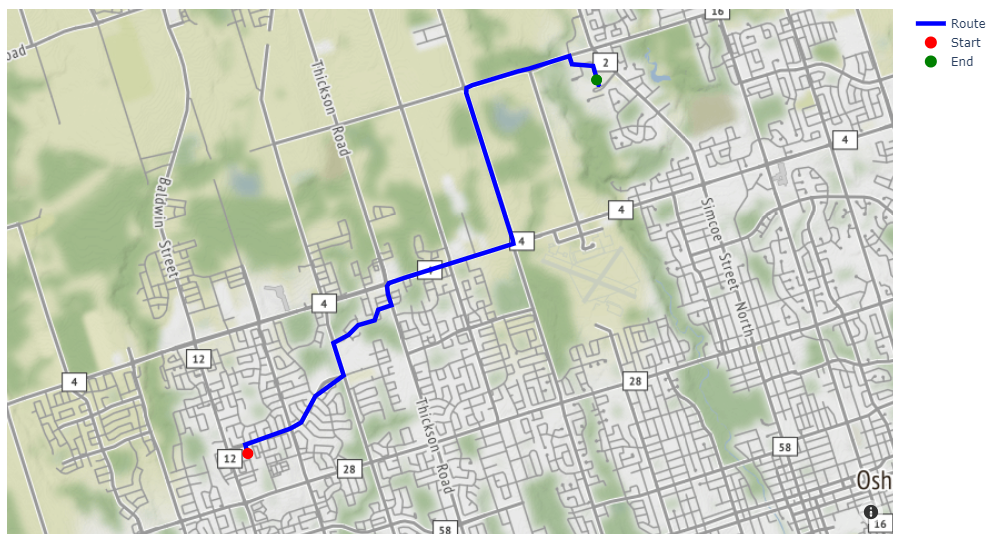

In [28]:
Image(filename='route.png')

### Itemizing the Route

In [29]:
for ind in simplified_route.index:
    print('{} for {:.2f} metres at speed {} km/h.'.format(simplified_route['Street Name'][ind], 
                                                      simplified_route['Length'][ind],
                                                     simplified_route['Speed'][ind]))

Vanier Street for 102.86 metres at speed 50 km/h.
Dryden Boulevard for 1582.70 metres at speed 60 km/h.
Anderson Street for 422.30 metres at speed 60 km/h.
Darren Avenue for 967.81 metres at speed 50 km/h.
Thickson Road for 290.27 metres at speed 80 km/h.
Taunton Road East for 1562.18 metres at speed 80 km/h.
Taunton Road West for 59.00 metres at speed 80 km/h.
Thornton Road North for 9.86 metres at speed 80 km/h.
Thornton Road North for 2010.65 metres at speed 60 km/h.
Conlin Road West for 1334.51 metres at speed 60 km/h.
Founders Drive for 689.77 metres at speed 50 km/h.
